Name: Siddhi Lahange
UID: 2019230066

**Heart disease Mortality prediction**     
Problem statement: To predict the chances of deaths(mortality) due to heart disease/strokes.

Abstract:
Cardiovascular diseases are a category of diseases wherein the heart malfunctions primarily due to blockages and clots in blood vessels. The causes of cardiovascular diseases widely range from lack of physical activity to unhealthy choices of food, which make them the number one cause of death globally. Thus, there arises a need to accurately predict the chance of survival for a person suffering from cardiovascular diseases. Machine learning and data analytics has proved to be quite useful in prediction tasks. Today, the amount of patient data accessible has increased considerably, which makes machine learning algorithms most suitable for understanding the relation between symptoms and cardiovascular diseases. 


Stroke is a medical condition that can lead to the death of a person. It’s a severe condition and if treated on time we can save one’s life and treat them well. There can be n number of factors that can lead to strokes and in this project, we will try to analyze a few of them. I have taken the dataset from Kaggle. 
Dataset description:
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.




# **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Attribute Information**


1)	id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(10)
## Displaying top 10 rows
data.info()
## Showing information about datase
data.describe()
## Showing data's statistical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The description about the dataframe in columns:

The above dataframe displaying 10 columns shows the total count, mean, std deviation, min value, 25%, 50%, 75% and maximum value of each attribute in the respective columns and not the parameter values, the detailed information about the parameter values of the attributes is available on the link of the dataset.
I have included snippets of the columns of the dataset for more understanding.
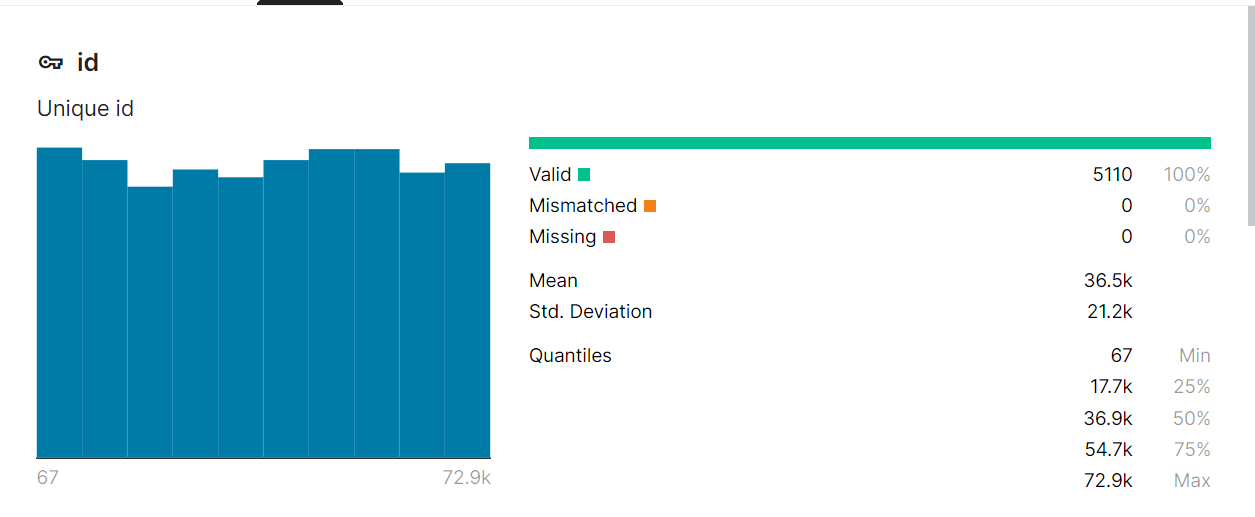
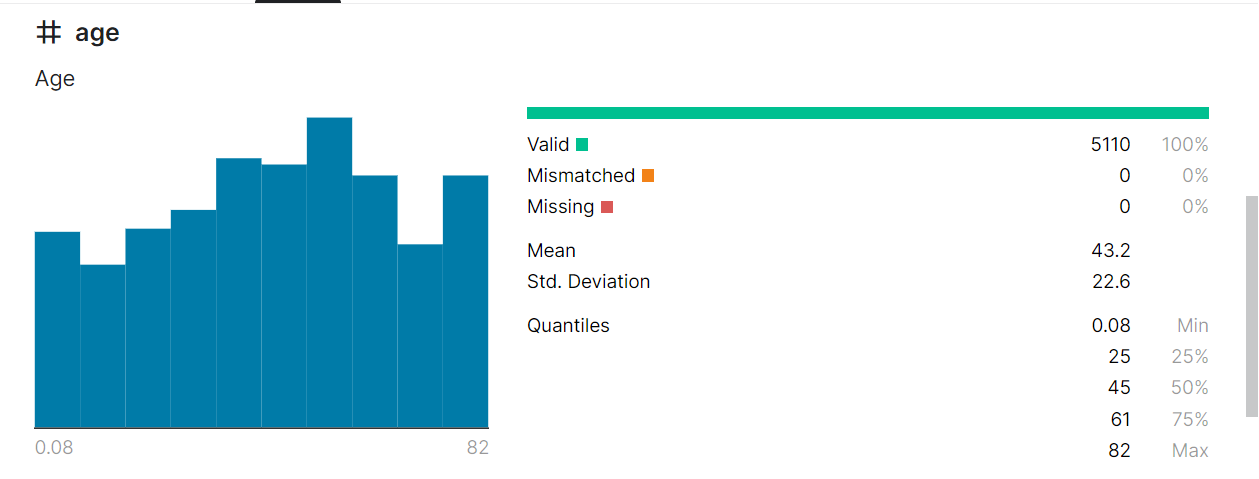
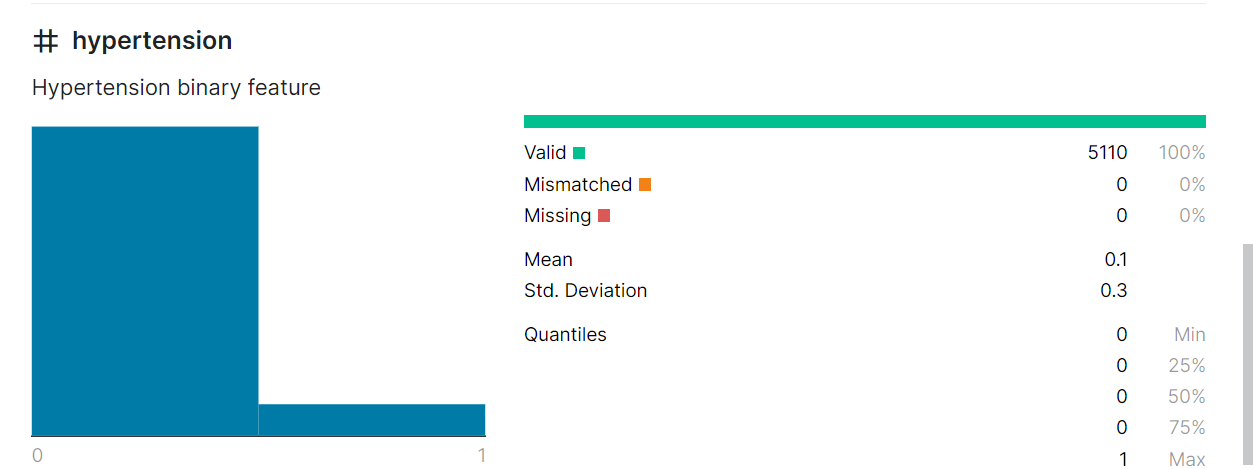
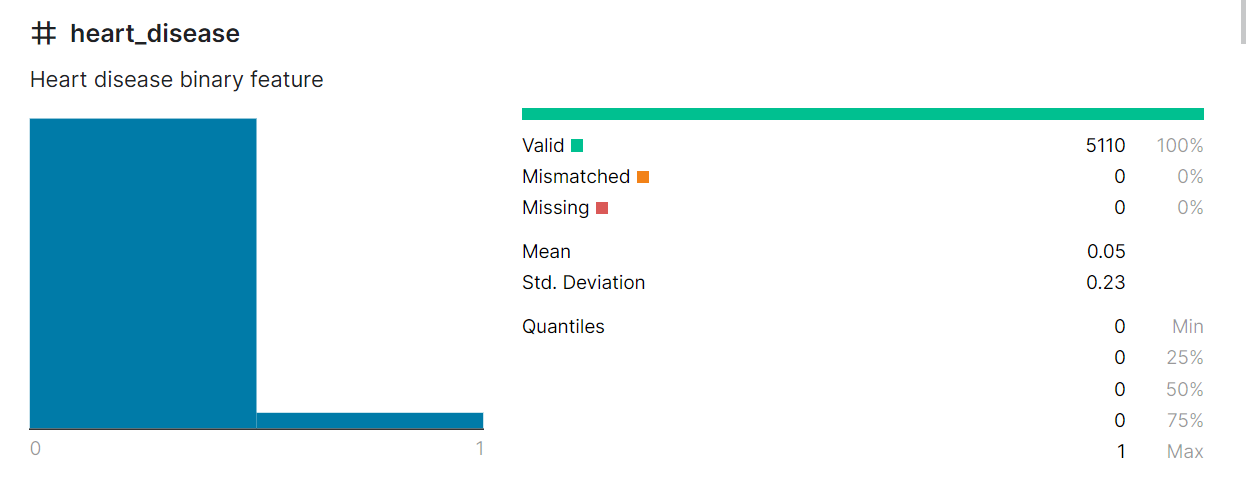
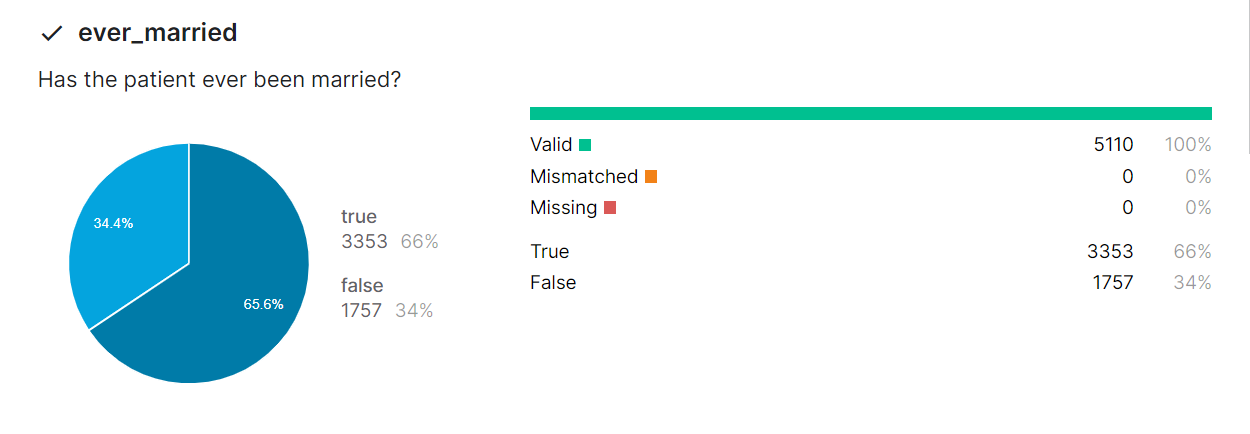
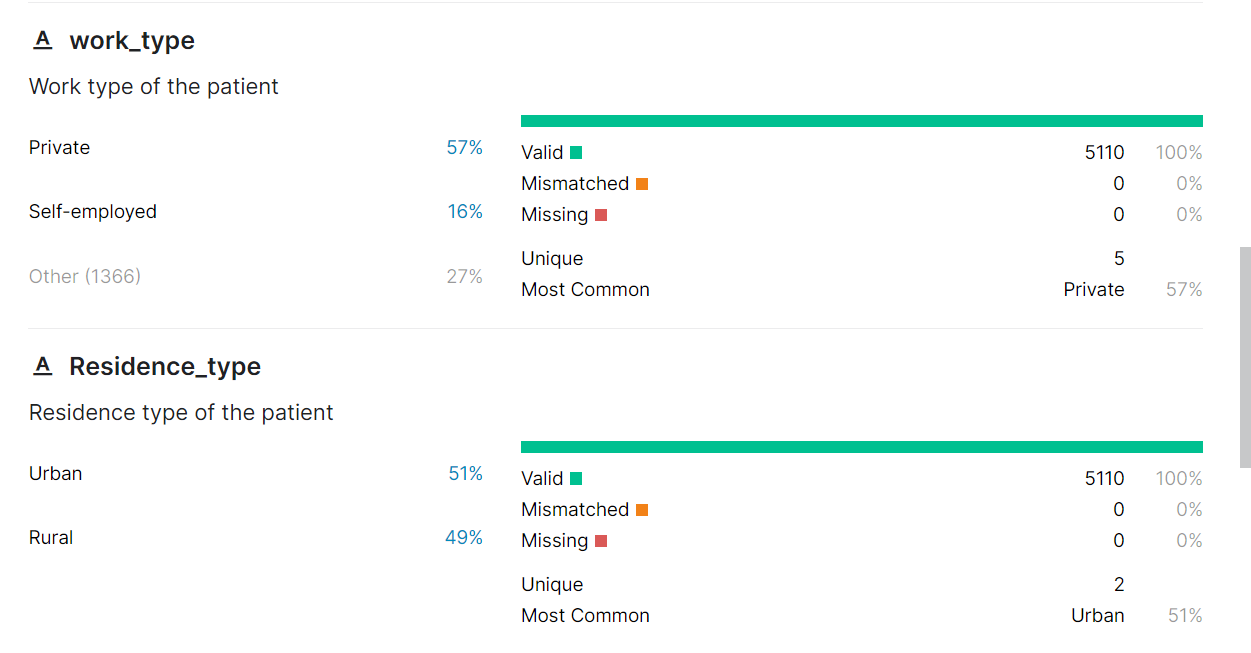
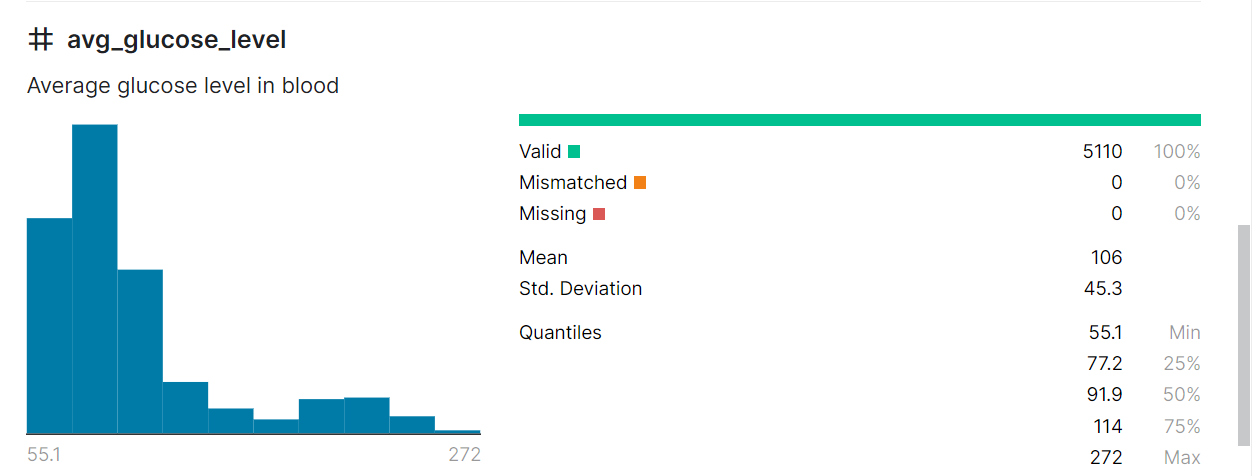
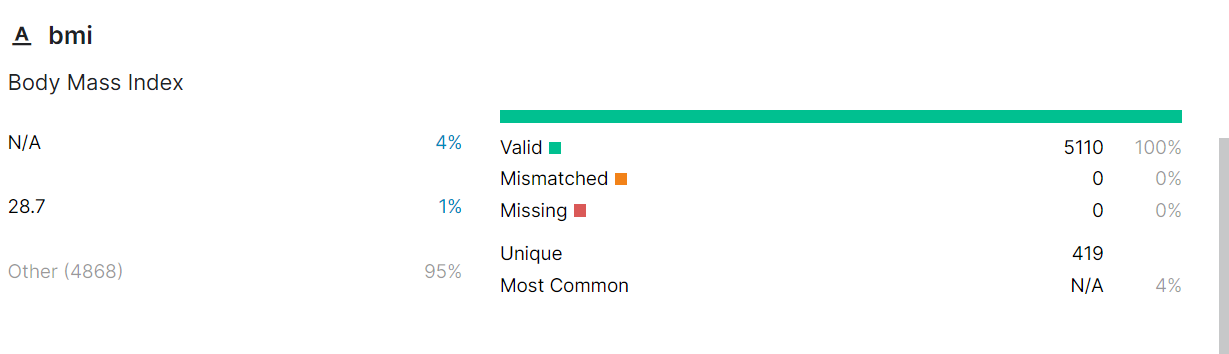

In [ ]:
# EDA
ID

ID is nothing but a unique number assigned to every patient to keep track of them and making them unique. There is no need for ID it’s completely useless so remove it.



In [ ]:
data.drop("id",inplace=True,axis=1)

In [ ]:
# Gender

This attribute states the gender of the patient.Now we see how does Gender affects and Gender wise comparison of stroke rate.

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


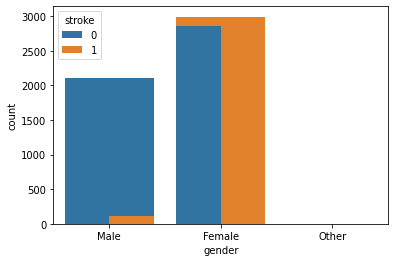

In [ ]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())
# Above codes will help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='gender')
# Helps to plot a count plot which will help us to see count of values in each unique category.
sns.countplot(data=data,x='gender',hue='stroke')
# This plot will help to analyze how gender will affect chances of stroke.

In [ ]:
# Observation:

 the dataset is imbalanced, there is not much difference between stroke rate concerning gender

In [ ]:
# Age
Here age is just not a number, it’s one of the significant or as we can say it’s a very crucial factor. Let us analyze our data and see how much impact actual impact it has.

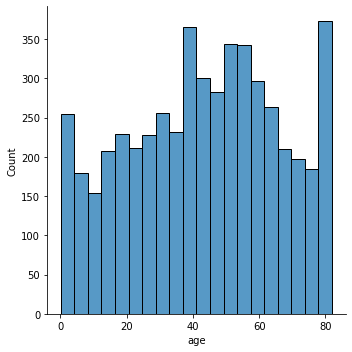

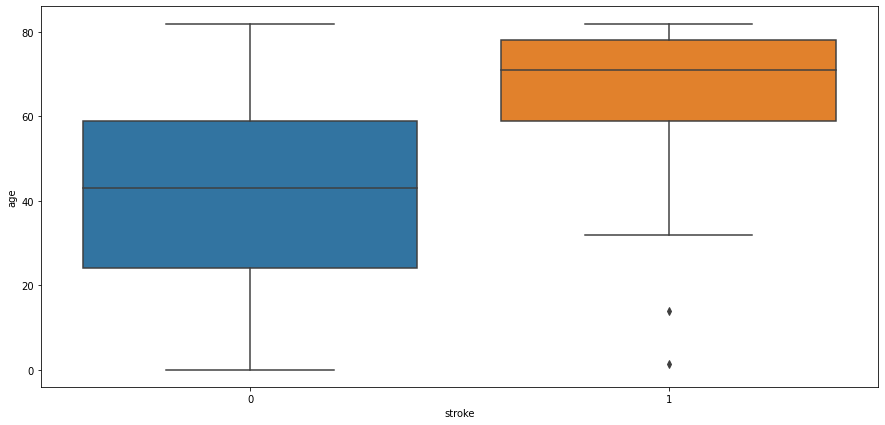

In [ ]:
data['age'].nunique()
# Returns number of unique values in this attribute
sns.displot(data['age'])
# This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

In [ ]:
# Number of Unique Values: 104

In [ ]:
# Observation:

People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 are having a stroke it might be possible that it’s valid data as stroke also depends on our eating and living habits. Another observation is people not having strokes also consist of people age > 60 years.

In [ ]:
# Heart Disease
People having heart disease tends to have a higher risk of having a stroke if proper care is not taken.

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


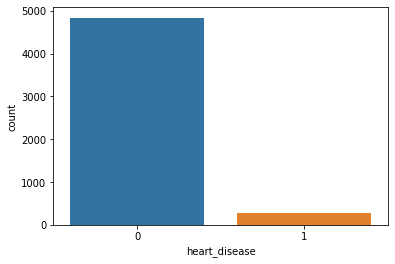

In [ ]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
sns.countplot(data=data,x='heart_disease')
# Will plot a counter plot of variable heart diseases

In [ ]:
# Observation:

Because of the imbalanced dataset, it’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.



In [ ]:
#Married
This attribute will tell us whether or not the patient was ever married. Let us see how will it affect the chances of having a stroke.

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


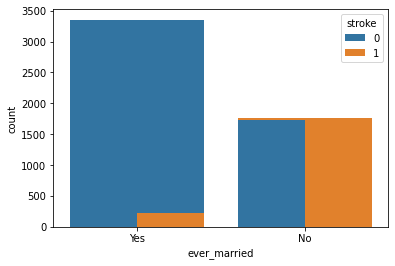

In [ ]:
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())
# Above code will show us number unique values of attribute and its count
sns.countplot(data=data,x='ever_married')
# Counter plot of ever married attribute
sns.countplot(data=data,x='ever_married',hue='stroke')
# Ever married with respect of stroke


In [ ]:
# Observation:

People who are married have a higher stroke rate

In [ ]:
# Work Type
This attribute contains data about what kind of work does the patient. Different kinds of work have different kinds of problems and challenges which can be the possible reason for excitement, thrill, stress, etc. Stress is never good for health, let’s see how this variable can affect the chances of having a stroke.

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


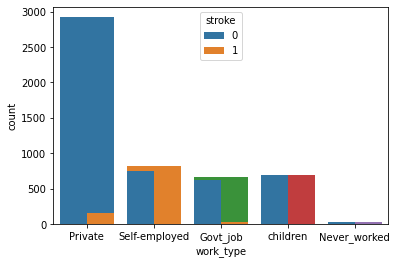

In [ ]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())
# Above code will return unique values of attributes and its count
sns.countplot(data=data,x='work_type')
# Above code will create a count plot
sns.countplot(data=data,x='work_type',hue='stroke')
# Above code will create a count plot with respect to stroke

In [ ]:
# Observation:

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

In [ ]:
# Residence Type
This attribute tells us whether what kind of residence the patient is. It can be Urban or Rural.

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


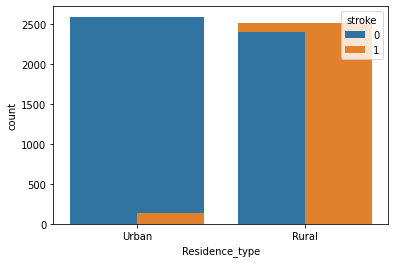

In [ ]:
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())
# Above code will return unique values of variable and its count
sns.countplot(data=data,x='Residence_type')
# This will create a counter plot
sns.countplot(data=data,x='Residence_type',hue='stroke')
# Residence Type with respect to stroke

In [ ]:
Observation:

This attribute is of no use. As we can see there not much difference in both attribute values. 

In [ ]:
# Average Glucose Level
Tells about the average glucose level in the patient’s body. Let us see whether this affects the chances of having a stroke

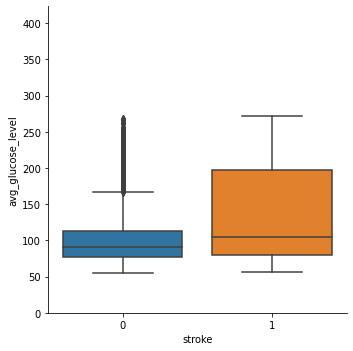

In [ ]:
data['avg_glucose_level'].nunique()
# Number of unique values
sns.displot(data['avg_glucose_level'])
# Distribution of avg_glucose_level
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')
# Avg_glucose_level and Stroke

In [ ]:
# Observation:

From this above graph, we can see that people having stroke have an average glucose level of more than 100. There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

In [ ]:
# BMI
Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. Let us see how does it affect the chances of having a stroke.

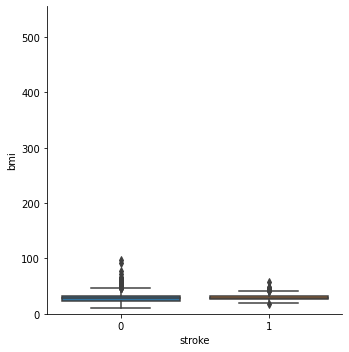

In [ ]:
data['bmi'].isna().sum()
# Returns number null values
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
# Filling null values with average value
data['bmi'].nunique()
# Returns number of unique values in that attribute
sns.displot(data['bmi'])
# Distribution of bmi
sns.boxplot(data=data,x='stroke',y='bmi')
# BMI with respect to Stroke

In [ ]:
# Observation:

There is as such no prominent observation of how does BMI affects the chances of having a stroke.

In [ ]:
# Smoking Status
These attributes tell us whether or not the patient smokes. Smoking is injurious to health and may cause cardiac disease. We will see how it turns out in the case of our data.

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


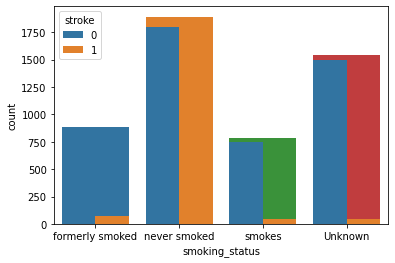

In [ ]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())
# Returns unique values and its count
sns.countplot(data=data,x='smoking_status')
# Count plot of smoking status
sns.countplot(data=data,x='smoking_status',hue='stroke')
# Smoking Status with respect to Stroke

In [ ]:
# Observation:

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

In [ ]:
# Stroke
Our target variable. It tells us whether patients have chances of stroke.

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


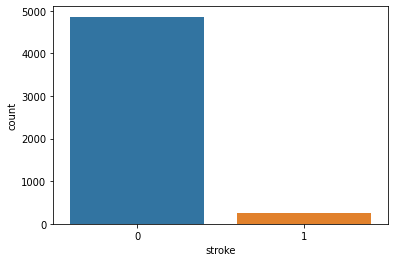

In [ ]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())
# Returns Unique Value and its count
sns.countplot(data=data,x='stroke')
# Count Plot of Stroke

In [ ]:
# Feature Engineering
Label Encoding
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Our dataset is a mix of both categorical and numeric data and since ML algorithms understand data of numeric nature so we encode our categorical data into numeric ones using Label Encoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to n-1.

In [ ]:
cols=data.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(data.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender   age  hypertension  ...        bmi  smoking_status  stroke
0       1  67.0             0  ...  36.600000               1       1
1       0  61.0             0  ...  28.893237               2       1
2       1  80.0             0  ...  32.500000               2       1
3       0  49.0             0  ...  34.400000               3       1
4       0  79.0             1  ...  24.000000               2       1
5       1  81.0             0  ...  29.000000               1       1
6       1  74.0             1  ...  27.400000               2       1
7       0  69.0             0  ...  22.800000               2       1
8       0  59.0             0  ...  28.893237               0       1
9       0  78.0             0  ...  24.200000               0       1

[10 rows x 11 columns]


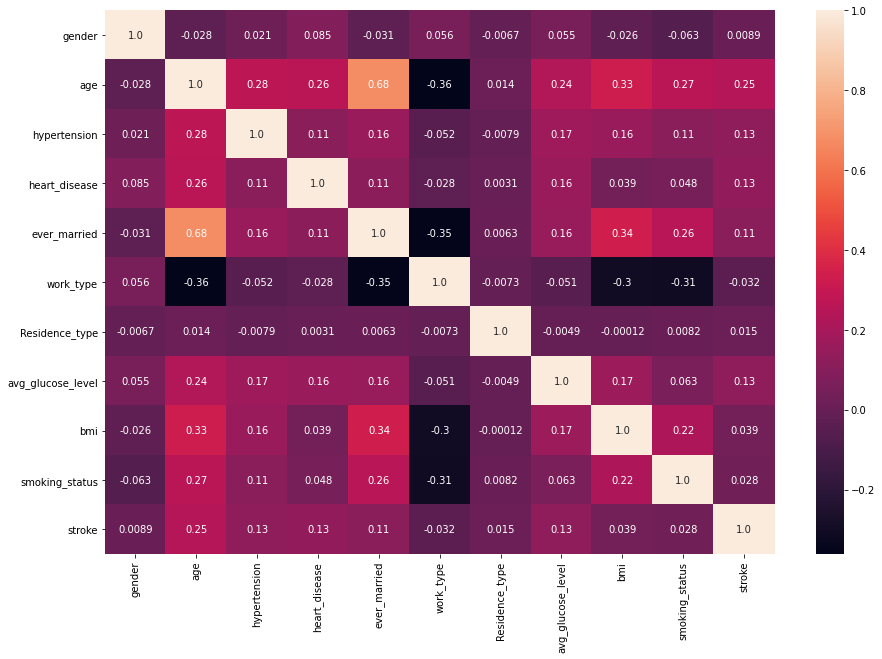

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [ ]:
# Observation:

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.
 let’s check our features using SelectKBest and F_Classif.

In [ ]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In [ ]:
# In the above result, we can see that age is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 50. Resulting in the same features we got in the heatmap.

In [ ]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [ ]:
# Splitting data
Now, let’s split features into training and testing sets for training and testing our classification models.

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)
#Splitting data
train_x.shape,test_x.shape,train_y.shape,test_y.shape
# Shape of data

((3832, 5), (1278, 5), (3832,), (1278,))

In [ ]:
# Balancing Dataset
The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
As we know, our dataset is imbalanced. So let’s balance our data. We are going to use SMOTE method for this. It will populate our data with records similar to our minor class. Usually, we perform this on the whole dataset but as we have very fewer records of minor class I am applying it on both train and test data. Earlier I tried doing it by just resampling data of the training dataset but it didn’t perform that well so I tried this approach and got a good result.

In [ ]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7296, 5) (7296,) (2426, 5) (2426,)


In [ ]:
# Model Creation
I have created models namely, Logistic Regression, and XGBClassifier. Out of which XGBClassifier model’s performance was outstanding. So I am just adding XGBClassifier.

XGBoost Classifier Algorithm:
XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.
The boosting ensemble technique consists of three simple steps:

An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
A new model h1 is fit to the residuals from the previous step
Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0:


In [ ]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

Accuracy -->  0.9241549876339654
F1 Score -->  0.9195804195804196
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      1351
           1       0.87      0.98      0.92      1075

    accuracy                           0.92      2426
   macro avg       0.92      0.93      0.92      2426
weighted avg       0.93      0.92      0.92      2426



In [ ]:
# So we can see the accuracy, f1 score precision and recall values over here. In the balanced dataset, we rely on accuracy but here we have an imbalanced dataset, I am going with the f1 score. For a good classifier, it would be great to have good precision and recall score. Out of all models, XGBClassifier has a great result. So as a model, I am selecting XGBClassifier.

In [ ]:
# Closure
So in this mini-project, I saw some of the factors that might result in strokes. Where Age was highly correlated followed by hypertension, heart disease, avg glucose level, and ever married.
XGBClassifier performed well. There are outliers in some variable, reason behind why I kept it as it is because these things are either depends on other factors and there are possibilities of having such kind of records.
 

References:
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1121520/
2. https://www.nature.com/articles/s41598-020-62133-5
3. https://towardsdatascience.com/heart-disease-risk-assessment-using-machine-learning-83335d077dad
4. https://www.youtube.com/watch?v=EUzexQGkH8k